In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Regions example

The country of Chile is divided administratively into 15 regions. The size of the country is 756,096 square kilometers. How big do you think the region of Atacama is? Let $A1$ be the event that Atacama is less than 10,000 square kilometers. Let $A2$ be the event that Atacama is between 10,000 and 50,000 square kilometers. Let $A3$ be the event that Atacama is between 50,000 and 100,000 square kilometers. Let $A4$ be the event that Atacama is more than 100,000 square kilometers. Assign probabilities to $A1,…,A4\ldots$

In [1]:
country_size = 756096
n_regions = 15

In [3]:
country_size / n_regions

50406.4

In [32]:
x1 = [10, 40, 60, 30]

In [33]:
def softmax(x):
    x = np.array(x)
    return np.e**x / sum(np.e**x)

def normalize(x):
    x = np.array(x)
    return x / sum(x)

In [34]:
softmax(x1)

array([1.92874984e-22, 2.06115362e-09, 9.99999998e-01, 9.35762295e-14])

In [35]:
normalize(x1)

array([0.07142857, 0.28571429, 0.42857143, 0.21428571])

Atacama is the fourth largest of 15 regions. Using this information, revise your probabilities.


In [36]:
x2 = [1, 10, 90, 60]

In [37]:
normalize(x2)

array([0.00621118, 0.0621118 , 0.55900621, 0.37267081])

The smallest region is the capital region, Santiago Metropolitan, which has an area of 15,403 square kilometers. Using this information, revise your probabilities.

In [39]:
x3 = [0, 10, 120, 80]

In [40]:
normalize(x3)

array([0.        , 0.04761905, 0.57142857, 0.38095238])

The third largest region is Aysén del General Carlos Ibáñez del Campo, which has an area of 108,494 square kilometers. Using this information, revise your probabilities.

In [41]:
x4 = [0, 1, 150, 60]

In [42]:
normalize(x4)

array([0.        , 0.00473934, 0.71090047, 0.28436019])

By now, $A3$ should have most of the probability. Indeed, Atacama has an area of 75,176 square kilometers.

In [48]:
# Visualize
data_1 = pd.DataFrame([x1, x2, x3, x4], columns = ['A1', 'A2', 'A3', 'A4'])

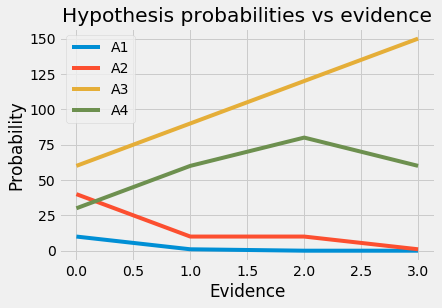

In [51]:
for col in data_1.columns:
    plt.plot(data_1[col], label = f'{col}')
plt.legend()
plt.title('Hypothesis probabilities vs evidence')
plt.xlabel('Evidence')
plt.ylabel('Probability')
plt.show()

## HIV example

Let's assume that:

$$P(+|HIV) = .977$$
$$P(-|noHIV) = .926$$
$$P(HIV) = .0026$$

Whats $P(HIV|+)$?


Using Bayes theorm:

$$\large P(HIV|+) = \frac{P(+|HIV)P(HIV)}{P(+|HIV)P(HIV)+P(+|noHIV)P(noHIV)}$$

In [88]:
p_plus_hiv = .997
p_plus_nohiv = 1 - .926
p_hiv = .0026

In [89]:
posteriors = []
for i in range(6):
    p_hiv_plus = (p_plus_hiv * p_hiv) / (p_plus_hiv * p_hiv + p_plus_nohiv * (1 - p_hiv))
    posteriors.append(p_hiv_plus)
    p_hiv = p_hiv_plus
    print(p_hiv)

0.03392940819216806
0.3211985733662778
0.8644105878281441
0.9884915922371528
0.9991366165919703
0.9999358661176829


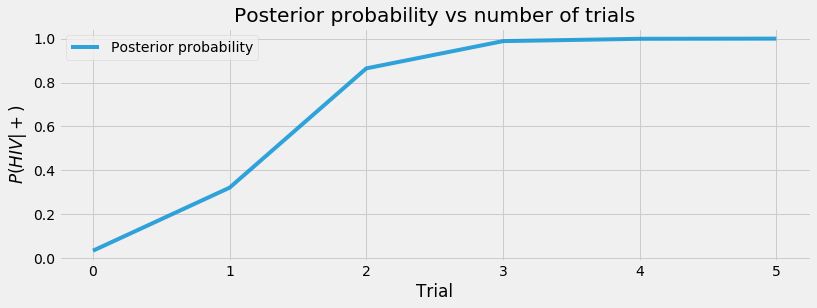

In [90]:
plt.figure(figsize = (12, 4))
plt.plot(posteriors, alpha = .8, label = 'Posterior probability')
plt.title('Posterior probability vs number of trials')
plt.xlabel('Trial')
plt.ylabel('$P(HIV|+)$')
plt.legend()
plt.show()

For multi-event situations with mutually exclusive events, we can generalize Bayes theorem as follows:


$$\large P(A|B) = \frac{P(B|A)P(A)}{\sum_i^nP(B|A_i)P(A_i)}$$

## Titanic example

In [92]:
survived = [203, 118, 178, 212]
n_surv = [122, 167, 528, 673]
all_passengers = np.array([survived, n_surv])

If we randomly select a person's name from the complete list of passengers and crew, what is the probability that this person travelled in 1st class? Round your answer to two decimal places.

In [98]:
# Probability that you travelled 1st class
all_passengers.sum(axis = 0)[0] / all_passengers.sum()

0.14766015447523853

What is the probability that a (randomly selected) person survived? Round your answer to two decimal places.

In [100]:
# Probability that survived
all_passengers.sum(axis = 1)[0] / all_passengers.sum()

0.3230349840981372

What is the probability that a (randomly selected) person survived, given that they were in 1st class? Round your answer to two decimal places.

In [104]:
all_passengers[0, 0] / all_passengers[:, 0].sum()

0.6246153846153846

## Marbles example

You have three bags, labeled A, B, and C. Bag A contains two red marbles and three blue marbles. Bag B contains five red marbles and one blue marble. Bag C contains three red marbles only.

In [105]:
A = ['r'] * 2 + ['b'] * 3
B = ['r'] * 5 + ['b'] * 1
C = ['r'] * 3

If you select from bag B, what is the probability that you will draw a red marble? Express the exact answer as a simplified fraction.

In [107]:
5/6

0.8333333333333334

If you randomly select one of the three bags with equal probability (so that $P(A)=P(B)=P(C)=1/3$) and then randomly draw a marble from that bag, what is the probability that the marble will be blue? Round your answer to two decimal places.

Hint: This is the marginal probability P(blue)P(\text{blue})P(blue). You can obtain this using the law of total probability (which appears in the denominator in Bayes' theorem). It is 

$P(blue)=P(blue∩A)+P(blue∩B)+P(blue∩C)=P(blue∣A)⋅P(A)+P(blue∣B)⋅P(B)+P(blue∣C)⋅P(C)$

In [113]:
3/5 * 1/3 + 1/6 * 1/3 + 0

0.25555555555555554

Suppose a bag is randomly selected (again, with equal probability), but you do not know which it is. You randomly draw a marble and observe that it is blue. What is the probability that the bag you selected this marble from is A? That is, find $P(A∣blue)$. Round your answer to two decimal places.

In [6]:
p_A = 1/3
p_B = 1/3
p_C = 1/3
p_blue_A = 3/5
p_blue_B = 1/6
p_blue_C = 0

In [7]:
p_A_blue = (p_blue_A * p_A) / (p_blue_A * p_A + p_blue_B * p_B + p_blue_C * p_C)

In [8]:
p_A_blue

0.782608695652174

Suppose a bag is randomly selected (again, with equal probability), but you do not know which it is. You randomly draw a marble and observe that it is red. What is the probability that the bag you selected from is C? That is, find $P(C∣red)$. Round your answer to two decimal places.

In [9]:
p_A = 1/3
p_B = 1/3
p_C = 1/3
p_red_A = 2/5
p_red_B = 5/6
p_red_C = 1

In [10]:
p_C_red = (p_red_C * p_C) / (p_red_C * p_C + p_red_B * p_B + p_red_A * p_A)

In [11]:
p_C_red

0.4477611940298507